In [1]:
#Import Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

#Load Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

#Filter for Data Analyst UK jobs
job_title1 = 'Data Analyst'
job_country = 'United States'
df_da_us = df[(df['job_title_short'] == job_title1) & (df['job_country'] == job_country)].copy()

In [2]:
df_da_us = df_da_us.dropna(subset=['salary_year_avg'])

In [4]:
df_da_us = df_da_us.explode('job_skills')

In [7]:
df_da_us_group = df_da_us.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

In [12]:
df_da_top_pay = df_da_us_group.sort_values(by='median', ascending=False).head(10)
df_da_skills = df_da_us_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)


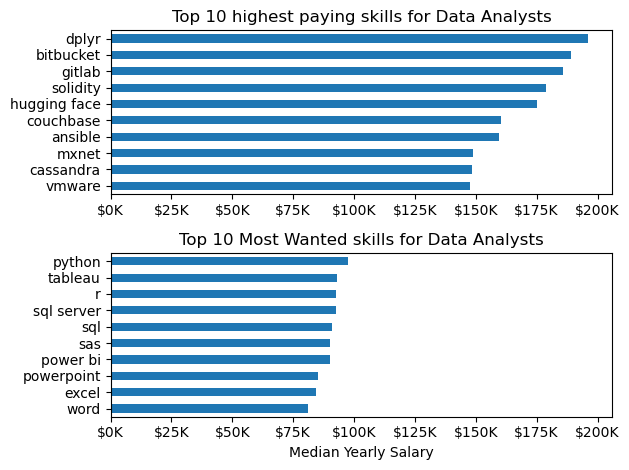

In [27]:
fig, ax = plt.subplots(2, 1)
df_da_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) #[::-1] is to reverse the axes, similary to ax[0].invert_yaxis
ax[0].set_title(f'Top 10 highest paying skills for {job_title1}s')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

df_da_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title(f'Top 10 Most Wanted skills for {job_title1}s')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Yearly Salary')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
ax[1].set_xlim(ax[0].get_xlim())

fig.tight_layout()

